# zerotopandas-course-project_NIFTY_Analysis

In this project we will analyze 2021 NIFTY Daily Open, High, Low, Close data and find out how much profitable we can make, if we trade based on previous day candle pattern.

We only consider few candle patterns for the trade they are
- Marubozu
- Shooting Start
- Hammer

Entry Criteria
- Postive Marubozu and Hammer Candle  >> Go Long
- Negative Marubozu  and Shooting Star Candle >> Go Short
- To get the real world experience we consider entring NIFTY Open +/- 5 Points
- Since we consider daliy data, result are calculated based on day close price.

Here is the example image of Moribuzu, Hammer and Shooting star candle
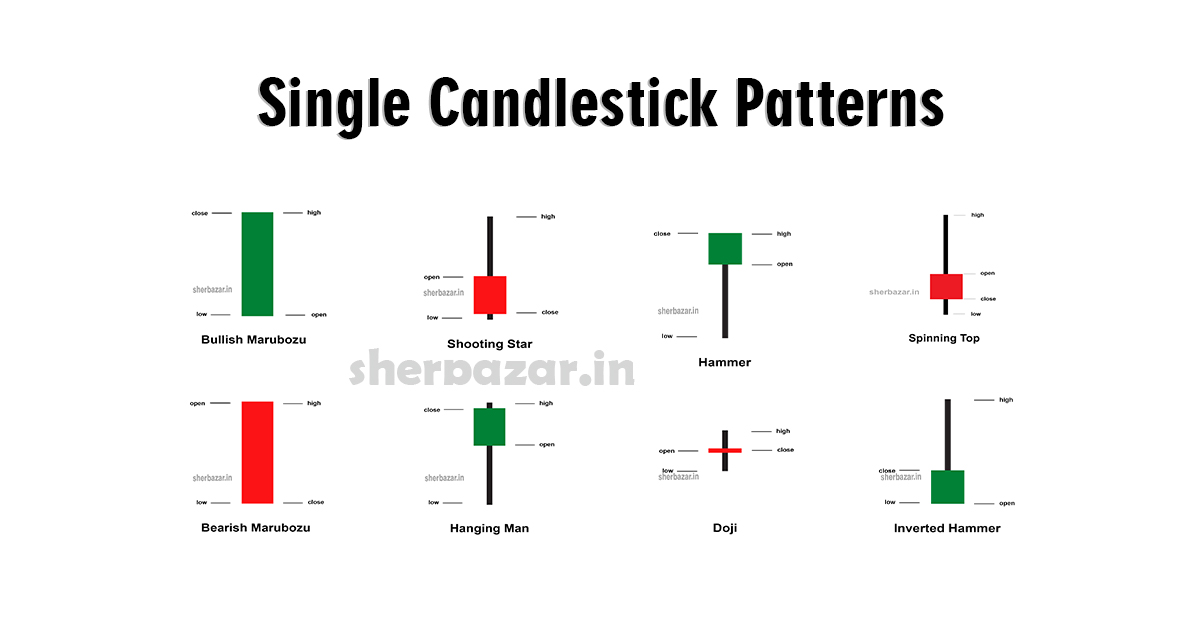

# Project Task Coverage

- Taking data with more than 3 Column with 248 Rows
- You must ask and answer at least 4 questions about the dataset. Questions asked post analysis are listed below
    - Whether the strategy is Profitable or not
    - Which Candle Pattern gives most successful resutls
    - Which Candle Pattern gives most losses
    - Most Occuring Candle
    - Least Occuring Candle
    - Candle that gives best results 
- Graph will be plotted for below detiails:
    - Month wise P and L
    - Total Number of Candle Patterns Occured during the whole time peroid
    - Candle Pattern with PL ratio
    - Total trade took on Every Month

In [154]:
!pip install jovian --upgrade -q
!pip install matplotlib seaborn --upgrade --quiet

ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'c:\\programdata\\anaconda3\\lib\\site-packages\\__pycache__\\pylab.cpython-39.pyc'
Consider using the `--user` option or check the permissions.



### 1. Imporing required modules

In [155]:
import pandas as pd
import jovian
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [156]:
project_name = "zerotopandas-course-project-starter_niftyanalysis" 

In [157]:
jovian.commit(project=project_name)

<IPython.core.display.Javascript object>

[jovian] Updating notebook "vrnaveenkr/zerotopandas-course-project-starter-niftyanalysis" on https://jovian.ai/
[jovian] Committed successfully! https://jovian.ai/vrnaveenkr/zerotopandas-course-project-starter-niftyanalysis


'https://jovian.ai/vrnaveenkr/zerotopandas-course-project-starter-niftyanalysis'

### 2. Importing Raw Nifty 50 data for year 2021

In [158]:
nifty_raw_data = pd.read_csv('data.csv')
nifty_data = nifty_raw_data.copy()

In [159]:
nifty_data

,Date,Open,High,Low,Close,Shares Traded,Turnover (Rs. Cr)
0,01-Jan-21,13996.10,14049.85,13991.35,14018.50,258090905,15873.75
1,04-Jan-21,14104.35,14147.95,13953.75,14132.90,494999295,28705.09
2,05-Jan-21,14075.15,14215.60,14048.15,14199.50,492475349,30872.87
3,06-Jan-21,14240.95,14244.15,14039.90,14146.25,632323316,34615.55
4,07-Jan-21,14253.75,14256.25,14123.10,14137.35,559173512,33446.47
...,...,...,...,...,...,...,...
238,20-Dec-21,16824.25,16840.10,16410.20,16614.20,330614079,25123.59
239,21-Dec-21,16773.15,16936.40,16688.25,16770.85,241030834,19783.04
240,22-Dec-21,16865.55,16971.00,16819.50,16955.45,207946105,17443.94
241,23-Dec-21,17066.80,17118.65,17015.55,17072.60,196965302,15755.89


### 2.1 Converting Date Object type to datetime object for in depth analysis

In [160]:
nifty_data['date'] = pd.to_datetime(nifty_data.Date)
nifty_data['month'] = pd.DatetimeIndex(nifty_data.date).month
nifty_data['weeknum'] = nifty_data['date'].dt.week

C:\Users\vrnav\AppData\Local\Temp/ipykernel_24592/3996603228.py:3: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  nifty_data['weeknum'] = nifty_data['date'].dt.week


### 2.2 Removing Unwanted columns from the dataframe

In [161]:
nifty_data.drop(columns=['Shares Traded','Date','Turnover (Rs. Cr)'], inplace = True)

### 2.3 Calculating Differences between prices
- Differnce between Close and Open price of every day is calculated and added to data frame in column 'close_open'
- Difference between High and Low of ever day is calcualted and added to the data frame in column 'high_low'
- Percentage of Close_Open in High_Low Value is calulcated and added to Df in column 'OC_HL%' which we will use for later analysis
- OC - Open Close
- HL - High Low

In [162]:
nifty_data['close_open'] = nifty_data['Close'] - nifty_data['Open']
nifty_data['high_low'] = nifty_data.High - nifty_data.Low
nifty_data['OC_HL%'] = (nifty_data.close_open / nifty_data.high_low)*100


In [163]:
nifty_data

,Open,High,Low,Close,date,month,weeknum,close_open,high_low,OC_HL%
0,13996.10,14049.85,13991.35,14018.50,2021-01-01,1,53,22.40,58.50,38.290598
1,14104.35,14147.95,13953.75,14132.90,2021-01-04,1,1,28.55,194.20,14.701339
2,14075.15,14215.60,14048.15,14199.50,2021-01-05,1,1,124.35,167.45,74.260973
3,14240.95,14244.15,14039.90,14146.25,2021-01-06,1,1,-94.70,204.25,-46.364749
4,14253.75,14256.25,14123.10,14137.35,2021-01-07,1,1,-116.40,133.15,-87.420203
...,...,...,...,...,...,...,...,...,...,...
238,16824.25,16840.10,16410.20,16614.20,2021-12-20,12,51,-210.05,429.90,-48.860200
239,16773.15,16936.40,16688.25,16770.85,2021-12-21,12,51,-2.30,248.15,-0.926859
240,16865.55,16971.00,16819.50,16955.45,2021-12-22,12,51,89.90,151.50,59.339934
241,17066.80,17118.65,17015.55,17072.60,2021-12-23,12,51,5.80,103.10,5.625606


In [164]:
jovian.commit(project=project_name)

<IPython.core.display.Javascript object>

[jovian] Updating notebook "vrnaveenkr/zerotopandas-course-project-starter-niftyanalysis" on https://jovian.ai/
[jovian] Committed successfully! https://jovian.ai/vrnaveenkr/zerotopandas-course-project-starter-niftyanalysis


'https://jovian.ai/vrnaveenkr/zerotopandas-course-project-starter-niftyanalysis'

### 2.4 Identifying the candle type with python function.

- This function identifies the candle type and return the name as string
- Input : data_frame(pandas dataframe)
- Returns : (str) of candle pattern name

- This function analysis decides candle based on below criteria
    - if Close Open is Positive >> Bullish Candle
        - if OC_HL% is greater than 80 >> Up_Marubozu (Up Trend Marubozu Candle)
        - elif percentage of Open low difference in high low is greater than 55 then >> up_postive_hammer
        - elif percentage of Close High difference in high low is greater than -55 then >> down_postive_shooting
    - if Close Open is Negative >> Bearish Candle
        - if OC_HL% is greater than -80 >> Down_Marubozu (Down Trend Marubozu Candle)
        - elif percentage of Close Low difference in high low is greater than 55 then >> up_negative_hammer
        - elif percentage of Open High difference in high low is greater than -55 then >> down_negative_Shooting
        

In [165]:
def get_candle_type(data_frame):
    if data_frame['close_open'] > 0:
        if data_frame['OC_HL%'] > 80:
            return 'up_marubozu'
        elif (((data_frame.Open - data_frame.Low) / data_frame.high_low)*100) > 55:
            return 'up_postive_hammer'
        elif (((data_frame.Close - data_frame.High) / data_frame.high_low)*100) < -55:
            return 'down_postive_shooting'
    elif data_frame['close_open'] < 0 :
        if data_frame['OC_HL%'] < -80:
            return 'down_marubozu'
        elif (((data_frame.Close - data_frame.Low) / data_frame.high_low)*100) > 55:
            return 'up_negative_hammer'
        elif (((data_frame.Open - data_frame.High) / data_frame.high_low)*100) < -55:
            return 'down_negative_Shooting'
    

In [166]:
nifty_data['closed_candle_type'] = nifty_data.apply(get_candle_type, axis=1)

In [167]:
nifty_data

,Open,High,Low,Close,date,month,weeknum,close_open,high_low,OC_HL%,closed_candle_type
0,13996.10,14049.85,13991.35,14018.50,2021-01-01,1,53,22.40,58.50,38.290598,None
1,14104.35,14147.95,13953.75,14132.90,2021-01-04,1,1,28.55,194.20,14.701339,up_postive_hammer
2,14075.15,14215.60,14048.15,14199.50,2021-01-05,1,1,124.35,167.45,74.260973,None
3,14240.95,14244.15,14039.90,14146.25,2021-01-06,1,1,-94.70,204.25,-46.364749,None
4,14253.75,14256.25,14123.10,14137.35,2021-01-07,1,1,-116.40,133.15,-87.420203,down_marubozu
...,...,...,...,...,...,...,...,...,...,...,...
238,16824.25,16840.10,16410.20,16614.20,2021-12-20,12,51,-210.05,429.90,-48.860200,None
239,16773.15,16936.40,16688.25,16770.85,2021-12-21,12,51,-2.30,248.15,-0.926859,down_negative_Shooting
240,16865.55,16971.00,16819.50,16955.45,2021-12-22,12,51,89.90,151.50,59.339934,None
241,17066.80,17118.65,17015.55,17072.60,2021-12-23,12,51,5.80,103.10,5.625606,None


In [168]:
jovian.commit(project=project_name)

<IPython.core.display.Javascript object>

[jovian] Updating notebook "vrnaveenkr/zerotopandas-course-project-starter-niftyanalysis" on https://jovian.ai/
[jovian] Committed successfully! https://jovian.ai/vrnaveenkr/zerotopandas-course-project-starter-niftyanalysis


'https://jovian.ai/vrnaveenkr/zerotopandas-course-project-starter-niftyanalysis'

### 2.5 Filling Traded Candle column

- In order to identify the type of trade on current day we need to know the previous day candle type.
- So we add a new column called 'traded_candle' and shift the 'closed_candle_type' one step to get it aligned
- Then based on the candle type we decide whether to go long or short and fill the detail in the strategy column
    - Long
        - up_marubozu
        - up_postive_hammer
        - up_negative_hammer
    - Short
        - down_marubozu
        - down_negative_Shooting
        - down_postive_shooting

In [169]:
nifty_data['traded_candle'] = nifty_data['closed_candle_type'].shift(1)

In [170]:
nifty_data.loc[nifty_data['traded_candle'] == 'up_marubozu', 'strategy'] = 'Long'
nifty_data.loc[nifty_data['traded_candle'] == 'up_postive_hammer', 'strategy'] = 'Long'
nifty_data.loc[nifty_data['traded_candle'] == 'up_negative_hammer', 'strategy'] = 'Long'
nifty_data.loc[nifty_data['traded_candle'] == 'down_marubozu', 'strategy'] = 'Short'
nifty_data.loc[nifty_data['traded_candle'] == 'down_negative_Shooting', 'strategy'] = 'Short'
nifty_data.loc[nifty_data['traded_candle'] == 'down_postive_shooting', 'strategy'] = 'Short'

### 2.6 Handling Nan Values
- on the 'strategy' column apart from defined pattern in section 2.5 there are still more patterns for which the system fill the strategy with NaN(Not a Number) Value as we haven't defined it.
- Because of this the whole series becomes float. In order to make the series as string we need to handle NaN. So here we are updating them to 'NoTrade' string.

In [171]:
## Replacing NAN value strategy to No Trade
nifty_data['strategy'] = nifty_data['strategy'].fillna('NoTrade')

In [172]:
nifty_data

,Open,High,Low,Close,date,month,weeknum,close_open,high_low,OC_HL%,closed_candle_type,traded_candle,strategy
0,13996.10,14049.85,13991.35,14018.50,2021-01-01,1,53,22.40,58.50,38.290598,None,NaN,NoTrade
1,14104.35,14147.95,13953.75,14132.90,2021-01-04,1,1,28.55,194.20,14.701339,up_postive_hammer,None,NoTrade
2,14075.15,14215.60,14048.15,14199.50,2021-01-05,1,1,124.35,167.45,74.260973,None,up_postive_hammer,Long
3,14240.95,14244.15,14039.90,14146.25,2021-01-06,1,1,-94.70,204.25,-46.364749,None,None,NoTrade
4,14253.75,14256.25,14123.10,14137.35,2021-01-07,1,1,-116.40,133.15,-87.420203,down_marubozu,None,NoTrade
...,...,...,...,...,...,...,...,...,...,...,...,...,...
238,16824.25,16840.10,16410.20,16614.20,2021-12-20,12,51,-210.05,429.90,-48.860200,None,down_marubozu,Short
239,16773.15,16936.40,16688.25,16770.85,2021-12-21,12,51,-2.30,248.15,-0.926859,down_negative_Shooting,None,NoTrade
240,16865.55,16971.00,16819.50,16955.45,2021-12-22,12,51,89.90,151.50,59.339934,None,down_negative_Shooting,Short
241,17066.80,17118.65,17015.55,17072.60,2021-12-23,12,51,5.80,103.10,5.625606,None,None,NoTrade


### 2.7 Calculating Trade Results
- This function calculates the entry exit difference based on strategy column and returns the result
- Input : data_frame(pandas dataframe)
- Returns : result(float) >> difference between entry and exit
- For Long  
    - Open + 10 Points will be entry and exit will be close and difference is calculated and returned
- For Short
    - Open - 10 Points will be entry and exit will be close and difference is calculated and returned

In [174]:
def trade_result(data_frame):
    if 'Long' in data_frame['strategy']:
        result = data_frame['Close'] - (data_frame['Open']+5)
        return result
    elif 'Short' in data_frame['strategy']:
        result = -(data_frame['Close'] - (data_frame['Open']-5))
        return result

In [175]:
nifty_data['trade_result'] = nifty_data.apply(trade_result, axis=1)

In [176]:
nifty_data

,Open,High,Low,Close,date,month,weeknum,close_open,high_low,OC_HL%,closed_candle_type,traded_candle,strategy,trade_result
0,13996.10,14049.85,13991.35,14018.50,2021-01-01,1,53,22.40,58.50,38.290598,None,NaN,NoTrade,NaN
1,14104.35,14147.95,13953.75,14132.90,2021-01-04,1,1,28.55,194.20,14.701339,up_postive_hammer,None,NoTrade,NaN
2,14075.15,14215.60,14048.15,14199.50,2021-01-05,1,1,124.35,167.45,74.260973,None,up_postive_hammer,Long,119.35
3,14240.95,14244.15,14039.90,14146.25,2021-01-06,1,1,-94.70,204.25,-46.364749,None,None,NoTrade,NaN
4,14253.75,14256.25,14123.10,14137.35,2021-01-07,1,1,-116.40,133.15,-87.420203,down_marubozu,None,NoTrade,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
238,16824.25,16840.10,16410.20,16614.20,2021-12-20,12,51,-210.05,429.90,-48.860200,None,down_marubozu,Short,205.05
239,16773.15,16936.40,16688.25,16770.85,2021-12-21,12,51,-2.30,248.15,-0.926859,down_negative_Shooting,None,NoTrade,NaN
240,16865.55,16971.00,16819.50,16955.45,2021-12-22,12,51,89.90,151.50,59.339934,None,down_negative_Shooting,Short,-94.90
241,17066.80,17118.65,17015.55,17072.60,2021-12-23,12,51,5.80,103.10,5.625606,None,None,NoTrade,NaN


## 3.0 Graphical Analysis 

### 3.1 Trade Result Analysis

- By analyzing the number of trades and their results month wise we can identify
    - Which month is profitable
    - Which Month gives us more loss
    - Best performing month and why
    - do we see any pattern in the loss making months

In [198]:
nifty_data_monthly = nifty_data.groupby('month')

#### Extracting Month wise profits from Nifty data

In [199]:
nifty_data_monthly_result = nifty_data.groupby('month')[['trade_result']].sum()

#### Calculating number of valid trades per month

In [200]:
total_trade_taken = nifty_data[nifty_data.strategy != 'NoTrade']
nifty_data_monthly_trade = total_trade_taken.groupby('month')[['date']].count()
nifty_data_monthly_trade.rename(columns={'date':'Valid_Trades'},inplace=True)

In [180]:
trade_result = nifty_data_monthly_result.merge(nifty_data_monthly_trade,on='month')
trade_result['month'] = trade_result.index

In [181]:
trade_result

,trade_result,Valid_Trades,month
month,,,
1,637.90,7,1
2,77.55,7,2
3,-52.40,8,3
4,-552.35,9,4
5,164.35,3,5
6,-105.50,7,6
7,-47.40,9,7
8,296.80,8,8
9,-25.15,4,9


#### Plotting in graph

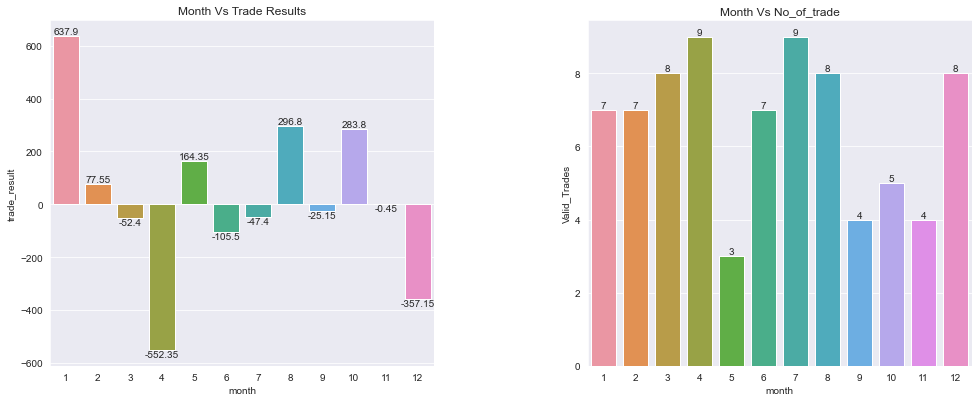

In [182]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6));
plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.4);



axes[0].set_title('Month Vs Trade Results');
bplot = sns.barplot(x='month',y='trade_result',data=trade_result,ax=axes[0]);
bplot.bar_label(bplot.containers[0]);

axes[1].set_title('Month Vs No_of_trade');
bplot = sns.barplot(x='month',y='Valid_Trades',data=trade_result,ax=axes[1]);
bplot.bar_label(bplot.containers[0]);

### Analysis Report :

#### 3.1.1 Chart Description 
- Month Vs Results 
    - Gives information about the trade results on every month
- Month Vs Number of Trades took 
    - Gives Information about Number of trades took every month
        
        
- From the report 'Month Vs Results' we found that out of 12 months we incured loss on 6 Months. 
- Also we found that the system is given us good profits and along with that we are also incuring big losses which eats up all our profits.

#### 3.1.2 Questions
- Which month is Most profitable?
    - Jan-2021 is the most profitable one as it gives us profit of 637.9 Points
- Which Month gives us more loss?
    - April-2021 give us the worst loss of about -552.35 Points.
- Best Performing month and why?
    - According to analysis Jan and May are best performing months because on Jan, we took 7 trades we earn 637 Points i.e 91 points per trade and in May we earn 164.35 Points in 3 trades that is 54 points per trade. 
-  Are we able to find out any pattern in the loss making months ?
    - Loss size of the strategy is very big. 
    - By comparing both the graph we found that on all the loss making months we took more number trades Excluding Aug months.
    - Moreover we can also see that On Apr which is our biggest loss month, we took higest number of trades.
    
#### 3.1.3 Conclusion:
- From the analysis we identified that making more number of trades increases probablity of loss more. 
- So we need to reduce the number of trades and so apart from analyzing Previous day OHLC, we need to add one more tool which can give us more confirmation to enter the trade. By doing this we can reduce the number of trade and increase the profit.
- Reduce the loss size by setting by following certain Risk Reward rules. 

### 3.2 Candle Pattern Analysis
- In this section we will analyze each candle pattern and their number of occurence in this series with their corresponding P and L report
- From this analysis we can find
    - which is the most repeatable candle pattern
    - which is the most profitable candle pattern
    - which is the best performing candle pattern
    - which candle pattern gives us more loss 
    - Outcome from this analysis

#### Filtering Candle pattern and grouping it

In [201]:
nifty_candle_pattern = nifty_data.groupby(['traded_candle'])[['date']].count()

In [202]:
nifty_candle_pattern.reset_index(inplace=True)
nifty_candle_pattern.rename(columns={'date':'occurance'},inplace=True)

In [203]:
nifty_candle_pattern

,traded_candle,occurance
0,down_marubozu,18
1,down_negative_Shooting,9
2,down_postive_shooting,5
3,up_marubozu,13
4,up_negative_hammer,15
5,up_postive_hammer,19


#### Getting trade results and merging it with candle pattern

In [204]:
nifty_candle_result = nifty_data.groupby(['traded_candle'])[['trade_result']].sum()

In [205]:
nifty_candle_result_merge = nifty_candle_result.merge(nifty_candle_pattern, on='traded_candle')

In [206]:
nifty_candle_result_merge

,traded_candle,trade_result,occurance
0,down_marubozu,325.85,18
1,down_negative_Shooting,15.60,9
2,down_postive_shooting,123.35,5
3,up_marubozu,-251.25,13
4,up_negative_hammer,-61.35,15
5,up_postive_hammer,167.80,19


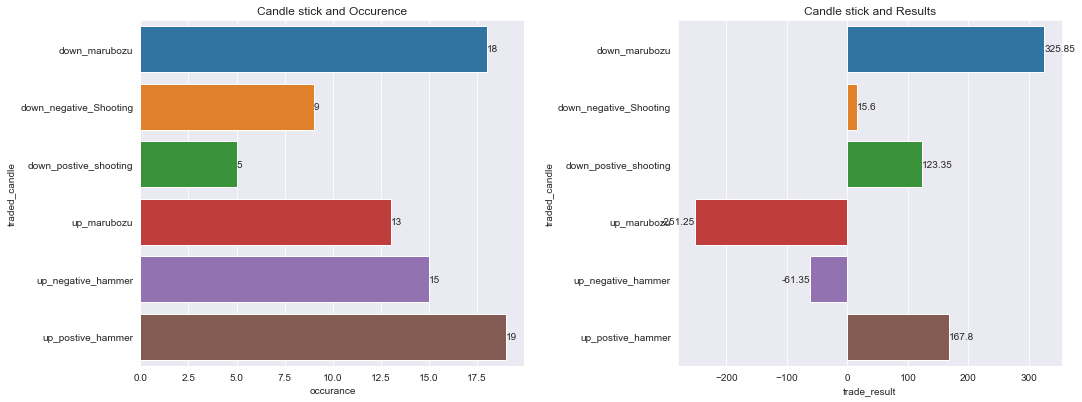

In [207]:

fig, axes = plt.subplots(1, 2, figsize=(16, 6));
plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.4);


axes[0].set_title('Candle stick and Occurence');
bplot = sns.barplot(x='occurance',y='traded_candle',data=nifty_candle_result_merge,ax=axes[0]);
bplot.bar_label(bplot.containers[0]);


axes[1].set_title('Candle stick and Results');
bplot = sns.barplot(x='trade_result',y='traded_candle',data=nifty_candle_result_merge,ax=axes[1]);
bplot.bar_label(bplot.containers[0]);

### Analysis Report :

####  3.2.1 Chart Description: 
    - Candle Stick Vs Occurence in the whole series:
        - This chart describes Number of times this patterns occurs in the series
    - Candle Stick Vs Trade Results:
        - This chart describes the Trade Results of each candle pattern
        
#### 3.2.2 Questions:
- which is the most repeatable candle pattern ?
    - Up Postive Hammer and Down Marubozu
- which is the most profitable candle pattern ?
    - Down Marubozu as we earn 325.85 Points from it
- which is the best performing candle pattern ?
    - Down_Positive_Shooting as we earn 123.35 points from just 5 Occurence. i.e 24 points per occurence
- which candle pattern gives us more loss ? and findings
    - up_Marubozu
    - Biggest drawdown occurs due to up_Marubozu candle. 
    - Marubozu Candle is a Continuous Pattern. i.e if we see Up Marubozu during up trend it confirms that there is very high probablity that the next day will be a positive one.
    - Since the market is already in saturation zone (over bought) zone during this series, every Strong up trend candles are used to book profits, that might be the reason why we had highest drawdown in this candle.


#### 3.2.3 Conclusion:

- Trend Reversal Candles such as "Shooting star or Hammer" are performs well on any situatons.
- we can avoid/Reduce continuous pattern "up_marubozu" losses in two ways
    - We can completly avoid trading Continous Pattern Candles Marubozu Candle
    - Add additional tool to confirm the strength of the trend and then enter the trade.

    

### 3.3 Analyzing Profit without Marubozu Candle Trade:

- In this section we will try the option 1 from the 3.2.3 conclusion 
- We are considering 1Lakh as our capital and considering nifty lot size is 50. Let's check how much profit we are getting without trading Marubozu Candle pattern

#### Excluding Marubozu Report from the results

In [208]:
nifty_candle_result_wo_maru =   nifty_candle_result_merge.drop(index=0)
nifty_candle_result_wo_maru =   nifty_candle_result_wo_maru.drop(index=3)

In [209]:
nifty_candle_result_wo_maru

,traded_candle,trade_result,occurance
1,down_negative_Shooting,15.60,9
2,down_postive_shooting,123.35,5
4,up_negative_hammer,-61.35,15
5,up_postive_hammer,167.80,19


In [210]:
candle_result_wo_maru = int(nifty_candle_result_wo_maru.trade_result.sum())
print(f"Total Points earned without Marubozu is {candle_result_wo_maru} which equates to Rs.{candle_result_wo_maru*50} which is {((candle_result_wo_maru*50)/100000)*100}%")

Total Points earned without Marubozu is 245 which equates to Rs.12250 which is 12.25%


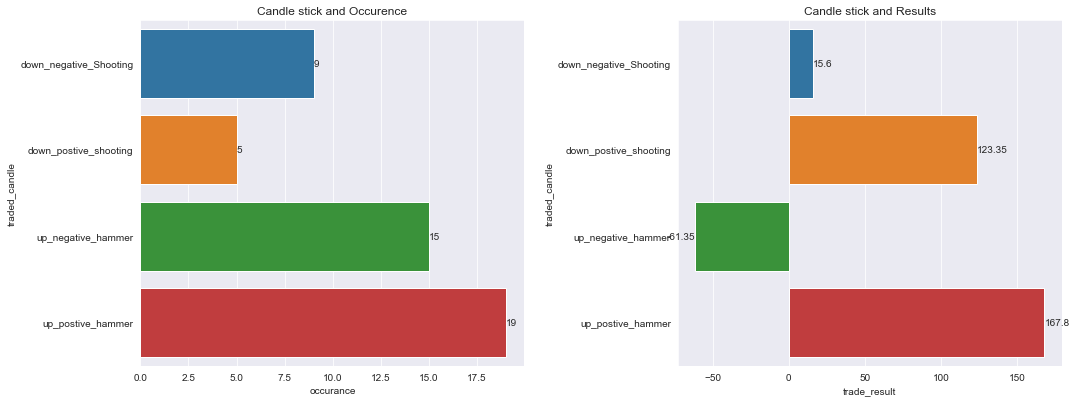

In [211]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6));
plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.4);


axes[0].set_title('Candle stick and Occurence');
bplot = sns.barplot(x='occurance',y='traded_candle',data=nifty_candle_result_wo_maru,ax=axes[0]);
bplot.bar_label(bplot.containers[0]);


axes[1].set_title('Candle stick and Results');
bplot = sns.barplot(x='trade_result',y='traded_candle',data=nifty_candle_result_wo_maru,ax=axes[1]);
bplot.bar_label(bplot.containers[0]);

### Analysis Report :

#### 3.3.1 Chart Description:
In this analysis as described we plotted the graph beteween Candle stick pattern, Occurence and Trade results excluding Marubozu candle.
- Candle Stick Vs Occurence in the whole series:
    - This chart describes Number of times this patterns occurs in the series
- Candle Stick Vs Trade Results:
    - This chart describes the Trade Results of each candle pattern

#### 3.3.2 Conclusion

- From the report we observed that we are getting ROI of 12.25% without trading in Marubozu candle. This profit is way better the FD.
- However normally we excpect 20 - 25% as ROI for trade. So we need to use option 2, i.e add another tool to confirm the strength of the trend such us using Volume and Moving average indicator or RSI to take trades on Marubozu candle and increase our profit.

In [212]:
jovian.commit(project=project_name)

<IPython.core.display.Javascript object>

[jovian] Updating notebook "vrnaveenkr/zerotopandas-course-project-starter-niftyanalysis" on https://jovian.ai/
[jovian] Committed successfully! https://jovian.ai/vrnaveenkr/zerotopandas-course-project-starter-niftyanalysis


'https://jovian.ai/vrnaveenkr/zerotopandas-course-project-starter-niftyanalysis'

### 4.0 Summary and Final Conclusion

#### 4.1 Summary of Analysis

In [213]:
Total_Tradable_days = nifty_data['date'].count()
total_trade_taken = nifty_data[nifty_data.strategy != 'NoTrade'].strategy.count()
profitable_Trade = nifty_data[nifty_data.trade_result > 0].date.count()
Loss_Trade = total_trade_taken - profitable_Trade
Total_Profit_Points = int(nifty_data[nifty_data.trade_result > 0].trade_result.sum())
Total_Loss_Points = int(nifty_data[nifty_data.trade_result < 0].trade_result.sum())
Final_Outcome = int(nifty_data['trade_result'].sum())


In [214]:
print(f"Total Tradable Days : {Total_Tradable_days}")
print(f"Total Trade Taken as per System : {total_trade_taken}")
print(f"Total Profitable_trades : {profitable_Trade}")
print(f"Total Loss_trades : {Loss_Trade}")
print(f"Total Profit Points Earned : {Total_Profit_Points} Points that is Rs.{Total_Profit_Points * 50}")
print(f"Total Profit Points Earned : {Total_Loss_Points} Points that is Rs.{Total_Loss_Points * 50}")
print(f"Final Return from Sytem : Profit of {Final_Outcome} Points Earned, that is Rs.{Final_Outcome*50} which is {((Final_Outcome*50)/100000)*100}% of 1 Lakh")
print(f"Total Points earned without Marubozu is {candle_result_wo_maru} which equates to Rs.{candle_result_wo_maru*50} which is {((candle_result_wo_maru*50)/100000)*100}%  of 1 Lakh")

Total Tradable Days : 243
Total Trade Taken as per System : 79
Total Profitable_trades : 38
Total Loss_trades : 41
Total Profit Points Earned : 4180 Points that is Rs.209000
Total Profit Points Earned : -3860 Points that is Rs.-193000
Final Return from Sytem : Profit of 319 Points Earned, that is Rs.15950 which is 15.950000000000001% of 1 Lakh
Total Points earned without Marubozu is 245 which equates to Rs.12250 which is 12.25%  of 1 Lakh


#### 4.2 Final Conclusion

- As per the oveall analysis the over all strategy is giving us profitable return of 15%. 
- Take aways from the Analysis
    - Reversal Candle Patterns are highly trustable for trading
    - By Avoiding Continuous Candle Pattern we can earn around 12% ROI
    - To Extend the return need to add additional tools.
- The biggest problem with the strategy is getting huge losses. By setting correct Risk Reward to the system we can even earn more return.
- For Marubozu Candle patterns to extend the profit we need to add trend strength confirmation Tools such as RSI.

#### 4.3 References

- NIFTY Data : https://www1.nseindia.com/products/content/equities/indices/historical_index_data.htm
- Candle Stick Pattern : https://zerodha.com/varsity/chapter/single-candlestick-patterns-part-1/
    

In [215]:
jovian.commit(project=project_name)

<IPython.core.display.Javascript object>

[jovian] Updating notebook "vrnaveenkr/zerotopandas-course-project-starter-niftyanalysis" on https://jovian.ai/
[jovian] Committed successfully! https://jovian.ai/vrnaveenkr/zerotopandas-course-project-starter-niftyanalysis


'https://jovian.ai/vrnaveenkr/zerotopandas-course-project-starter-niftyanalysis'